In [18]:
 %reload_ext autoreload

In [106]:


from model.base import Base
from model.head import Head
import torch
import h5py
import numpy as np
import os
from utils import build_h5,extract_features, get_model_from_ckpt,train,eval,lr_scheduler, makedirs,save_model,logging
from torch.optim import Adam
import gc
import re
from dataloader import get_dataloader

hard_dp = False
if hard_dp:
    dropout = [0.5,0.5,0.75]
else:
    dropout = [0.25,0.25,0.5]

base_model_type = 'inceptionv3'
num_level = 11
feature_type = 'wide'
head_type = 'multi_3FC'
if feature_type == 'wide':
    head_type = 'pool_3FC'
resize = True
augment = True
root = './experiment/'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
folder = makedirs(root,base_model_type,num_level,feature_type,head_type,resize,augment,hard_dp)

splits = ['train', 'val', 'test']
h5_paths = [os.path.join(folder,split + '_fea.h5') for split in splits]

In [82]:
%autoreload
from dataloader import get_dataloader
extract_batch_size = 1

imgloaders = get_dataloader(data_type='img',resize=resize,augment=augment,finetune=True,\
                            batch_size = extract_batch_size, head_type = head_type)

In [39]:
import matplotlib.pyplot as plt

%autoreload
from dataloader import ImgDataset

a = ImgDataset('./data/', 'train' , True, True, False)
b = iter(a)
feature, label = next(b)

"""for batch, (feature, label) in enumerate(imgloaders[2]):
    plt.imshow(np.moveaxis(feature[0].numpy(),0,-1))
    plt.show()
    print(label[0])"""

1000.jpg


'for batch, (feature, label) in enumerate(imgloaders[2]):\n    plt.imshow(np.moveaxis(feature[0].numpy(),0,-1))\n    plt.show()\n    print(label[0])'

10007.jpg


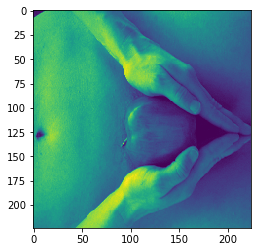

tensor(5.8876, dtype=torch.float64)


In [47]:
import numpy as np
feature, label = next(b)
plt.imshow(np.moveaxis(feature[0].numpy(),0,-1))
plt.show()
print(label[0])

In [2]:
import io
import zipfile
from PIL import Image


with zipfile.ZipFile('./data/images.zip', 'r') as zf:
    img = Image.open(io.BytesIO(zf.read('images/1000.jpg')))
    
time.time() - st

22.871988773345947

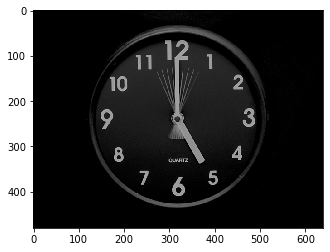

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
a = Image.open('./imgs/images/1006.jpg').convert("RGB")
plt.imshow(a)
plt.show()

In [11]:
import pandas as pd

df = pd.read_csv('./data/AVA.txt', header = None, delimiter = '\s+')
df.drop(columns = [0,12,13,14],inplace=True)


In [12]:
df['count'] = df.iloc[:,1:].sum(axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,count
0,953619,0,1,5,17,38,36,15,6,5,1,124
1,953958,10,7,15,26,26,21,10,8,1,2,126
2,954184,0,0,4,8,41,56,10,3,4,0,126
3,954113,0,1,4,6,48,37,23,5,2,2,128
4,953980,0,3,6,15,57,39,6,1,1,1,129


In [13]:
for i in range(2,12):
    df[i] = df[i]*(i-1)

In [14]:
df['MOS'] = df.iloc[:,1:-1].sum(axis=1)/df['count']
df.rename(columns = {1:'img'},inplace=True)

In [15]:
df.loc[(df.img==954113)]

,img,2,3,4,5,6,7,8,9,10,11,count,MOS
3,954113,0,2,12,24,240,222,161,40,18,20,128,5.773438


In [16]:
df.MOS.mean()

5.3833261234316145

In [17]:
df.set_index('img',inplace=True)
df.drop(columns = df.columns[:-1],inplace=True)
df.to_csv('./data/label.csv')

In [2]:
%cd F:\DA\SRP\AestheticPredictionMLSP

F:\DA\SRP\AestheticPredictionMLSP
